In [2]:
import praw
import pandas as pd
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji
import re
import en_core_web_sm
import spacy
import gensim
from gensim import corpora



In [3]:
reddit = praw.Reddit(client_id="2HIwI8CvGnWs4EhtmiDj8A", 
                     client_secret="tMg0CaYCq1JIK52M6zmlIkQMevD6Fg", 
                     user_agent="TEST API")



In [4]:
subreddit = reddit.subreddit('popular')

for submission in subreddit.search('TDD', limit=5):
    print('Title:', submission.title)
    print('Author:', submission.author)
    print('Upvotes:', submission.score)
    print('URL:', submission.url)

Title: TDD is super important and useful!
Author: PizzaConBacon
Upvotes: 12591
URL: https://i.redd.it/nevopagtgzha1.jpg
Title: Is TDD anywhere to be found in the real world?
Author: SlowAside5
Upvotes: 265
URL: https://www.reddit.com/r/ExperiencedDevs/comments/10m8yr1/is_tdd_anywhere_to_be_found_in_the_real_world/
Title: TDD (Total Dorn Death) will be achieved!
Author: Histovan
Upvotes: 116
URL: https://v.redd.it/zvpmpif3iwta1
Title: Underrated TDD
Author: paperlaner94
Upvotes: 555
URL: https://v.redd.it/lhep0qnyd7ga1
Title: Hello, I have finished Amnesia TDD many times but this is the first time it happens to me
Author: Faelzor
Upvotes: 10
URL: https://www.reddit.com/r/Amnesia/comments/12ys7da/hello_i_have_finished_amnesia_tdd_many_times_but/


In [5]:
Post1 = reddit.submission(id='11164wl')

In [6]:
Comments_All = []
Post1.comments.replace_more(limit=None)
for comments in Post1.comments.list():
    Comments_All.append(comments.body)
    

In [7]:
print(Comments_All, '\n')
print('Total Comments Scrapped=', (len(Comments_All)))


['I love doing my TDD after I finish the development', 'Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"\n\nMe doing TDD: "UGH"', 'For me it\'s just another tool to use when I get annoyed with my other tools.\n\nI tend to pull it out when I\'m having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). \n\nIterating over that is better than being stuck.', 'Here is my three steps to test driven development:\n\n1. Write the tests\n2. Write the code\n3. Change the tests so the code passes', "I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there's no time for testing because of the stakeholders' deadline.", 'Amateurs do TDD! We do IDD (incident driven development).', 'Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single h

In [9]:

List1 = Comments_All
List1 = [str(i) for i in List1]
string_uncleaned = ','.join(List1)
string_uncleaned


'I love doing my TDD after I finish the development,Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"\n\nMe doing TDD: "UGH",For me it\'s just another tool to use when I get annoyed with my other tools.\n\nI tend to pull it out when I\'m having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). \n\nIterating over that is better than being stuck.,Here is my three steps to test driven development:\n\n1. Write the tests\n2. Write the code\n3. Change the tests so the code passes,I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there\'s no time for testing because of the stakeholders\' deadline.,Amateurs do TDD! We do IDD (incident driven development).,Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single hyperlink to their

In [10]:
List1 = Comments_All
List1 = [str(i) for i in List1]
string_uncleaned = ','.join(List1)
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
string_emojiless = emoji_pattern.sub(r'', string_uncleaned)
print(string_emojiless)

I love doing my TDD after I finish the development,Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"

Me doing TDD: "UGH",For me it's just another tool to use when I get annoyed with my other tools.

I tend to pull it out when I'm having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). 

Iterating over that is better than being stuck.,Here is my three steps to test driven development:

1. Write the tests
2. Write the code
3. Change the tests so the code passes,I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there's no time for testing because of the stakeholders' deadline.,Amateurs do TDD! We do IDD (incident driven development).,Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single hyperlink to their home page.

Bu

In [11]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_emojiless)
print(tokenized_string)

['I', 'love', 'doing', 'my', 'TDD', 'after', 'I', 'finish', 'the', 'development', 'Me', 'reading', 'about', 'TDD', 'This', 'is', 'amazing', 'It', 'makes', 'so', 'much', 'sense', 'Of', 'course', 'Me', 'doing', 'TDD', 'UGH', 'For', 'me', 'it', 's', 'just', 'another', 'tool', 'to', 'use', 'when', 'I', 'get', 'annoyed', 'with', 'my', 'other', 'tools', 'I', 'tend', 'to', 'pull', 'it', 'out', 'when', 'I', 'm', 'having', 'the', 'programmer', 'version', 'of', 'writers', 'block', 'It', 'then', 'helps', 'me', 'to', 'start', 'with', 'a', 'known', 'set', 'of', 'conditions', 'the', 'failing', 'test', 'and', 'then', 'work', 'toward', 'a', 'specific', 'solution', 'a', 'successful', 'test', 'Iterating', 'over', 'that', 'is', 'better', 'than', 'being', 'stuck', 'Here', 'is', 'my', 'three', 'steps', 'to', 'test', 'driven', 'development', '1', 'Write', 'the', 'tests', '2', 'Write', 'the', 'code', '3', 'Change', 'the', 'tests', 'so', 'the', 'code', 'passes', 'I', 'love', 'when', 'prospective', 'employers'

In [13]:

lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

['i', 'love', 'doing', 'my', 'tdd', 'after', 'i', 'finish', 'the', 'development', 'me', 'reading', 'about', 'tdd', 'this', 'is', 'amazing', 'it', 'makes', 'so', 'much', 'sense', 'of', 'course', 'me', 'doing', 'tdd', 'ugh', 'for', 'me', 'it', 's', 'just', 'another', 'tool', 'to', 'use', 'when', 'i', 'get', 'annoyed', 'with', 'my', 'other', 'tools', 'i', 'tend', 'to', 'pull', 'it', 'out', 'when', 'i', 'm', 'having', 'the', 'programmer', 'version', 'of', 'writers', 'block', 'it', 'then', 'helps', 'me', 'to', 'start', 'with', 'a', 'known', 'set', 'of', 'conditions', 'the', 'failing', 'test', 'and', 'then', 'work', 'toward', 'a', 'specific', 'solution', 'a', 'successful', 'test', 'iterating', 'over', 'that', 'is', 'better', 'than', 'being', 'stuck', 'here', 'is', 'my', 'three', 'steps', 'to', 'test', 'driven', 'development', '1', 'write', 'the', 'tests', '2', 'write', 'the', 'code', '3', 'change', 'the', 'tests', 'so', 'the', 'code', 'passes', 'i', 'love', 'when', 'prospective', 'employers'

In [14]:
nlp = en_core_web_sm.load()
all_stopwords = nlp.Defaults.stop_words
text = lower_string_tokenized
tokens_without_sw = [word for word in text if not word in all_stopwords]
print(tokens_without_sw)


['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'makes', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tools', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writers', 'block', 'helps', 'start', 'known', 'set', 'conditions', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'steps', 'test', 'driven', 'development', '1', 'write', 'tests', '2', 'write', 'code', '3', 'change', 'tests', 'code', 'passes', 'love', 'prospective', 'employers', 'clients', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholders', 'deadline', 'amateurs', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hours', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pass', '8', 'tests', 'fine', 'better', 'way', 'fix', 'bugs', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smas

In [15]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(w) for w in tokens_without_sw]
print(lemmatized_tokens)


['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'make', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tool', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writer', 'block', 'help', 'start', 'known', 'set', 'condition', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'step', 'test', 'driven', 'development', '1', 'write', 'test', '2', 'write', 'code', '3', 'change', 'test', 'code', 'pass', 'love', 'prospective', 'employer', 'client', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholder', 'deadline', 'amateur', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pas', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smashing', 'boring', '

In [16]:
dictionary = corpora.Dictionary([lemmatized_tokens])
corpus = [dictionary.doc2bow(text) for text in [lemmatized_tokens]]

In [17]:
num_topics = 10
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
for i, topic in lda_model.print_topics(num_topics=num_topics):
    print(f"Topic {i}: {topic}\n")

Topic 0: 0.001*"test" + 0.001*"code" + 0.001*"t" + 0.001*"tdd" + 0.001*"s" + 0.001*"write" + 0.001*"work" + 0.001*"don" + 0.001*"need" + 0.001*"time"

Topic 1: 0.001*"test" + 0.001*"tdd" + 0.001*"code" + 0.001*"t" + 0.001*"write" + 0.001*"s" + 0.001*"work" + 0.001*"don" + 0.001*"need" + 0.001*"know"

Topic 2: 0.001*"test" + 0.001*"tdd" + 0.001*"code" + 0.001*"t" + 0.001*"s" + 0.001*"write" + 0.001*"work" + 0.001*"know" + 0.001*"time" + 0.001*"don"

Topic 3: 0.016*"test" + 0.008*"tdd" + 0.007*"code" + 0.007*"s" + 0.006*"t" + 0.005*"write" + 0.004*"work" + 0.003*"like" + 0.003*"know" + 0.003*"don"

Topic 4: 0.003*"test" + 0.001*"code" + 0.001*"tdd" + 0.001*"t" + 0.001*"s" + 0.001*"write" + 0.001*"work" + 0.001*"don" + 0.001*"way" + 0.001*"know"

Topic 5: 0.001*"test" + 0.001*"tdd" + 0.001*"s" + 0.001*"code" + 0.001*"t" + 0.001*"work" + 0.001*"write" + 0.001*"way" + 0.001*"time" + 0.001*"like"

Topic 6: 0.002*"test" + 0.001*"t" + 0.001*"tdd" + 0.001*"code" + 0.001*"s" + 0.001*"write" + 0.

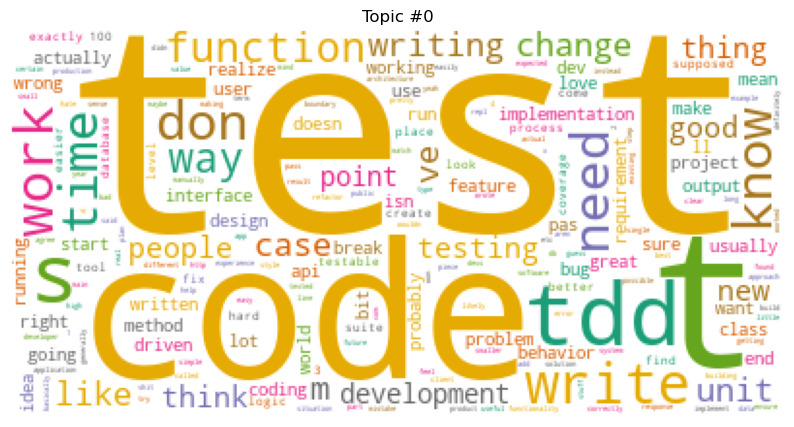

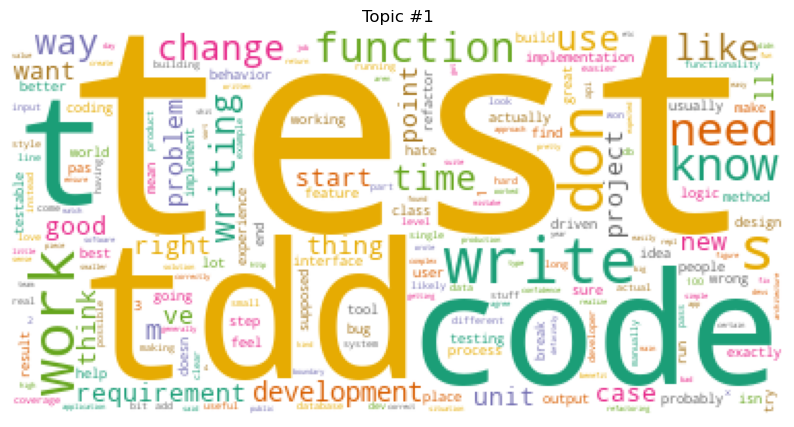

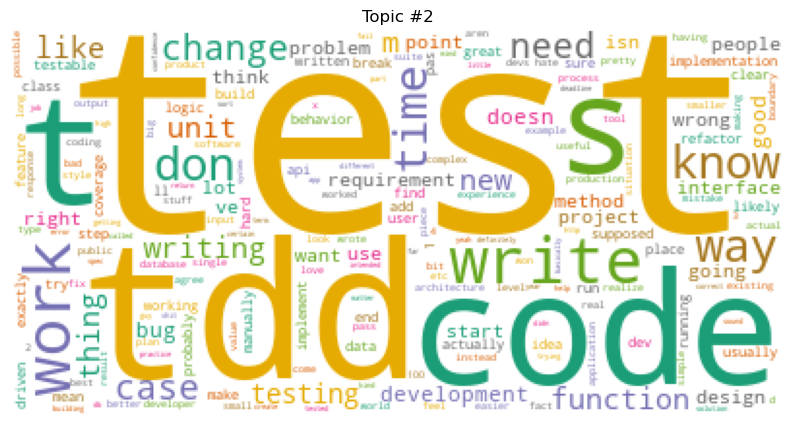

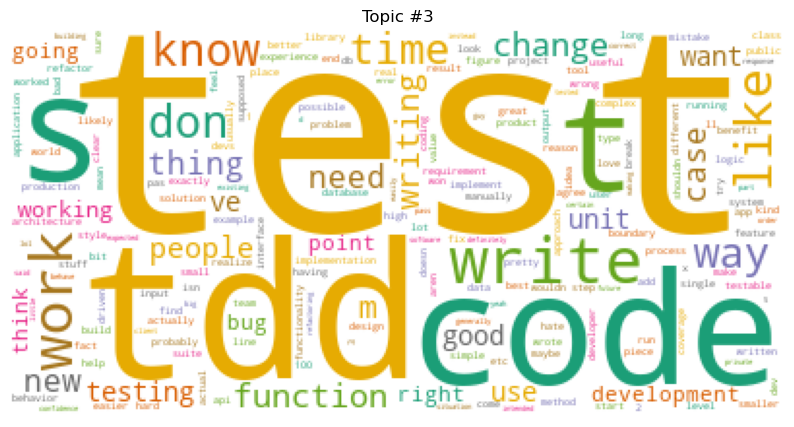

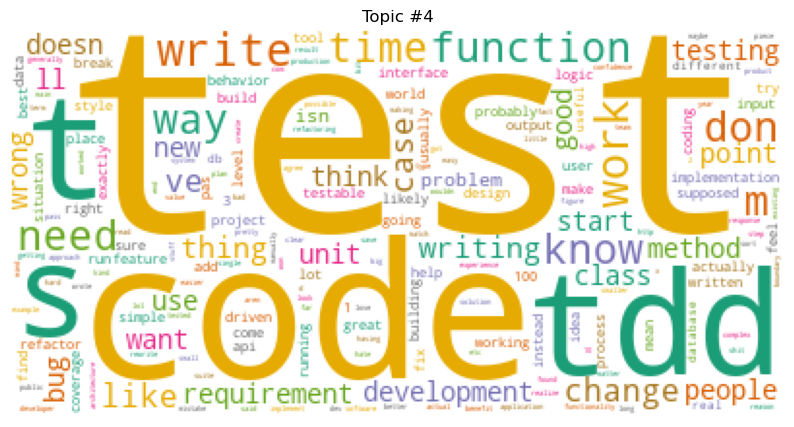

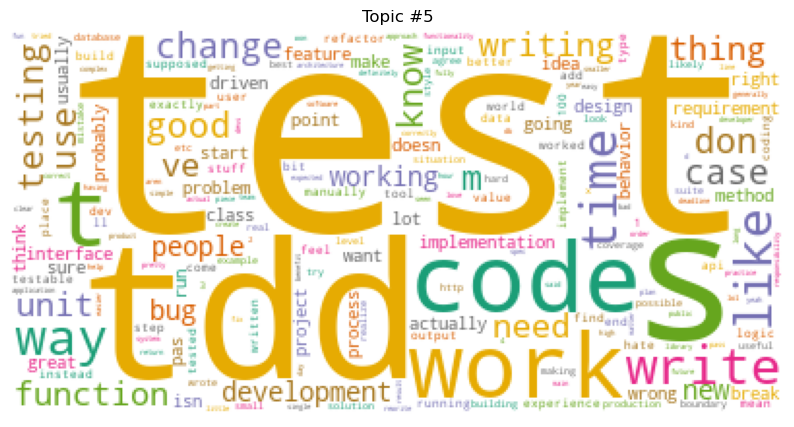

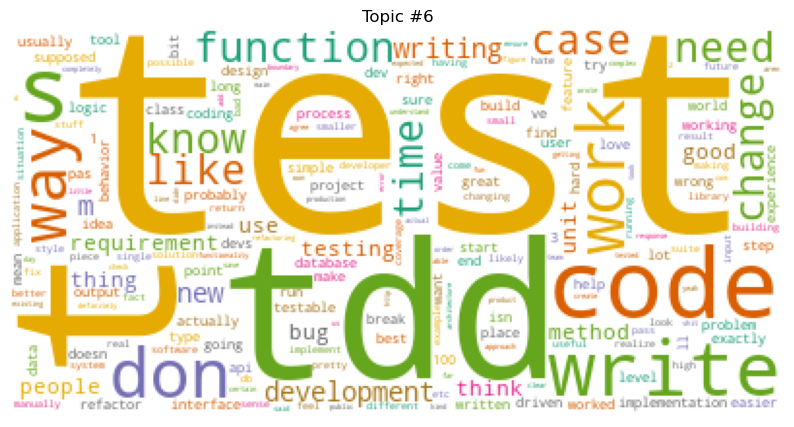

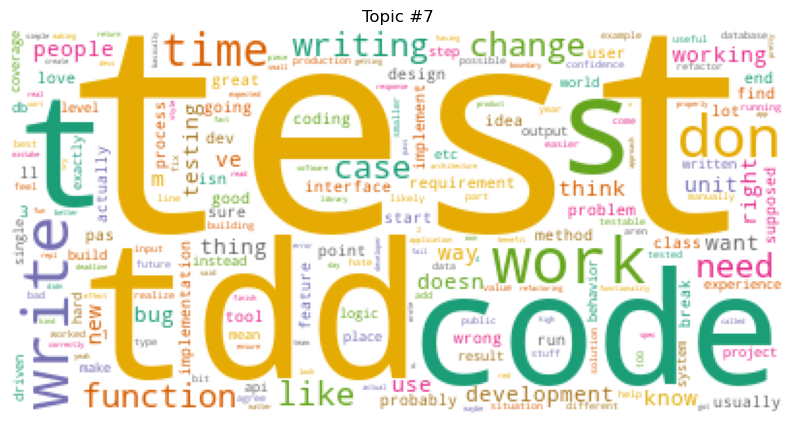

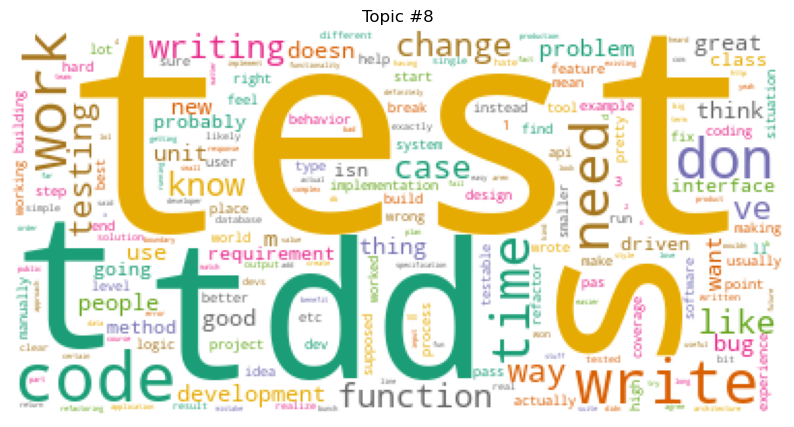

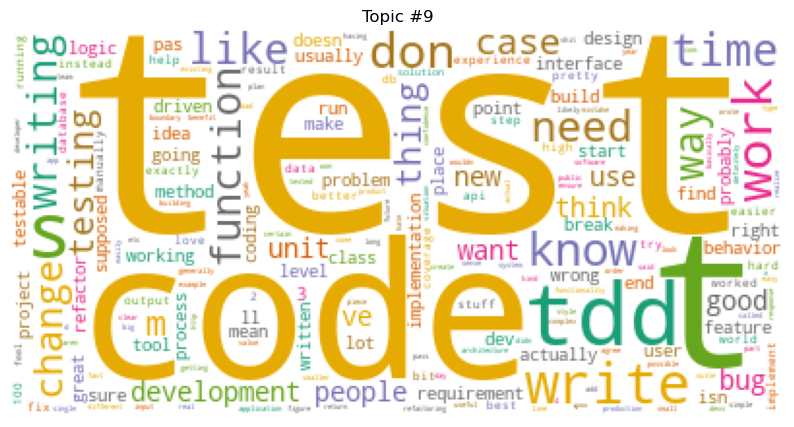

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for each topic
for i in range(num_topics):
    wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
    plt.figure(figsize=(10,10))
    plt.imshow(wc.fit_words(dict(lda_model.show_topic(i, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(i))
    plt.show()


In [19]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


C:\Users\ganja\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
9     -0.158298 -0.0       1        1  99.991436
3     -0.041133  0.0       2        1   0.000952
4      0.014864  0.0       3        1   0.000952
7      0.018091 -0.0       4        1   0.000952
6      0.020179  0.0       5        1   0.000952
8      0.025595  0.0       6        1   0.000952
0      0.028227 -0.0       7        1   0.000952
1      0.029795  0.0       8        1   0.000952
2      0.031798 -0.0       9        1   0.000952
5      0.030883  0.0      10        1   0.000952, topic_info=                Term        Freq       Total Category  logprob  loglift
2043            test  585.000000  585.000000  Default  30.0000  30.0000
2022             tdd  248.000000  248.000000  Default  29.0000  29.0000
351             code  252.000000  252.000000  Default  28.0000  28.0000
2005               t  250.000000  250.000000  Default  27.0000  27.0000
1748               s  208.000000  208.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
1031  implementation    0.000047   34.336626  Topic10  -7.6569  -1.9329
269              bug    0.000047   43.139253  Topic10  -7.6542  -2.1583
786          feature    0.000047   29.463538  Topic10  -7.6621  -1.7850
1459          people    0.000047   46.033902  Topic10  -7.6541  -2.2232
1347             new    0.000047   47.015936  Topic10  -7.6556  -2.2459

[811 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
31        1  0.935120           666
33        1  0.937378            75
48        1  0.932685      accepted
54        1  0.934899  accomplishes
60        1  0.934665       achieve
...     ...       ...           ...
2286      1  1.006504       writing
2290      1  0.932241           www
2302      1  0.932988     yesterday
2308      1  0.926982            yr
2311      1  0.928586           zen

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 5, 8, 7, 9, 1, 2, 3, 6])

In [17]:
!pip install pyLDAvis

     ---------------------------------------- 2.6/2.6 MB 1.3 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 14.9/14.9 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [20]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


C:\Users\ganja\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
9     -0.158298 -0.0       1        1  99.991436
3     -0.041133  0.0       2        1   0.000952
4      0.014864  0.0       3        1   0.000952
7      0.018091 -0.0       4        1   0.000952
6      0.020179  0.0       5        1   0.000952
8      0.025595  0.0       6        1   0.000952
0      0.028227 -0.0       7        1   0.000952
1      0.029795  0.0       8        1   0.000952
2      0.031798 -0.0       9        1   0.000952
5      0.030883  0.0      10        1   0.000952, topic_info=                Term        Freq       Total Category  logprob  loglift
2043            test  585.000000  585.000000  Default  30.0000  30.0000
2022             tdd  248.000000  248.000000  Default  29.0000  29.0000
351             code  252.000000  252.000000  Default  28.0000  28.0000
2005               t  250.000000  250.000000  Default  27.0000  27.0000
1748               s  208.000000  208.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
1031  implementation    0.000047   34.336626  Topic10  -7.6569  -1.9329
269              bug    0.000047   43.139253  Topic10  -7.6542  -2.1583
786          feature    0.000047   29.463538  Topic10  -7.6621  -1.7850
1459          people    0.000047   46.033902  Topic10  -7.6541  -2.2232
1347             new    0.000047   47.015936  Topic10  -7.6556  -2.2459

[811 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
31        1  0.935120           666
33        1  0.937378            75
48        1  0.932685      accepted
54        1  0.934899  accomplishes
60        1  0.934665       achieve
...     ...       ...           ...
2286      1  1.006504       writing
2290      1  0.932241           www
2302      1  0.932988     yesterday
2308      1  0.926982            yr
2311      1  0.928586           zen

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 5, 8, 7, 9, 1, 2, 3, 6])

In [21]:
!pip install afinn

     ---------------------------------------- 52.6/52.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=fac1a1a78bd48d2e32d0d0afe598900fb352d2a3005d2e66826dcf2ef2c89402
  Stored in directory: c:\users\ganja\appdata\local\pip\cache\wheels\79\91\ee\8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [22]:
from afinn import Afinn


In [24]:
afinn = Afinn()
sentiment_scores = [afinn.score(token) for token in lemmatized_tokens]



In [25]:
token_sentiment = list(zip(lemmatized_tokens, sentiment_scores))


In [26]:
for token, score in token_sentiment:
    print(f"{token}: {score}")


love: 3.0
tdd: 0.0
finish: 0.0
development: 0.0
reading: 0.0
tdd: 0.0
amazing: 4.0
make: 0.0
sense: 0.0
course: 0.0
tdd: 0.0
ugh: -2.0
s: 0.0
tool: 0.0
use: 0.0
annoyed: -2.0
tool: 0.0
tend: 0.0
pull: 0.0
m: 0.0
having: 0.0
programmer: 0.0
version: 0.0
writer: 0.0
block: -1.0
help: 2.0
start: 0.0
known: 0.0
set: 0.0
condition: 0.0
failing: -2.0
test: 0.0
work: 0.0
specific: 0.0
solution: 1.0
successful: 3.0
test: 0.0
iterating: 0.0
better: 2.0
stuck: -2.0
step: 0.0
test: 0.0
driven: 0.0
development: 0.0
1: 0.0
write: 0.0
test: 0.0
2: 0.0
write: 0.0
code: 0.0
3: 0.0
change: 0.0
test: 0.0
code: 0.0
pass: 0.0
love: 3.0
prospective: 0.0
employer: 0.0
client: 0.0
excited: 3.0
understanding: 0.0
tdd: 0.0
agile: 0.0
tell: 0.0
s: 0.0
time: 0.0
testing: 0.0
stakeholder: 0.0
deadline: 0.0
amateur: 0.0
tdd: 0.0
idd: 0.0
incident: 0.0
driven: 0.0
development: 0.0
partner: 0.0
company: 0.0
demo: 0.0
tdd: 0.0
workflow: 0.0
took: 0.0
hour: 0.0
add: 0.0
single: 0.0
hyperlink: 0.0
home: 0.0
page: 0.0
b